# practicalMixGauss_Apples

#### The goal of this part is to train and apply our MoG models to some images(apple).  In this cw, I trained MoG with 20 iterations with k = 2 for both apples and non-apples.(There is one exception which is intentionally made for better demonstration)



In [6]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
from scipy.stats import norm 
from scipy.stats import multivariate_normal
import time
import sys
import glob
##import cv2
flt_min = sys.float_info.min
%matplotlib notebook

In [7]:
## Loading the training images
ColorImgs = []

files = glob.glob("apples/*.jpg")
filesgt = glob.glob("appleMask/*.png")

ColorImgs = []
ColorImgsGT=[]
te =[]
for myFile in files:
    im = plt.imread(myFile)
    ColorImgs.append(im)
for myFile in filesgt:
    im = plt.imread(myFile)
    ColorImgsGT.append(im)
## reshape images into num_pixels x color channel form
apple1 = np.reshape(ColorImgs[0],(ColorImgs[0].shape[0]*ColorImgs[0].shape[1],ColorImgs[0].shape[2]))
applegt1 = np.reshape(ColorImgsGT[0],(ColorImgsGT[0].shape[0]*ColorImgsGT[0].shape[1],ColorImgsGT[0].shape[2]))
apple2 = np.reshape(ColorImgs[1],(ColorImgs[1].shape[0]*ColorImgs[1].shape[1],ColorImgs[1].shape[2]))
applegt2 = np.reshape(ColorImgsGT[1],(ColorImgsGT[1].shape[0]*ColorImgsGT[1].shape[1],ColorImgsGT[1].shape[2]))
apple3 = np.reshape(ColorImgs[2],(ColorImgs[2].shape[0]*ColorImgs[2].shape[1],ColorImgs[2].shape[2]))
applegt3 = np.reshape(ColorImgsGT[2],(ColorImgsGT[2].shape[0]*ColorImgsGT[2].shape[1],ColorImgsGT[2].shape[2]))



In [9]:
## Load images for C) part.
files = glob.glob("apples/testApples/*.jpg")
filesGT = glob.glob("appleMask/testApples/*.png")
TColorImgs = []
TColorImgsGT = []
for myFile in files:
    im = plt.imread(myFile)
    TColorImgs.append(im)
    #plt.figure(figsize=(10,5))
    #imgplot = plt.imshow(im)
for myFile in filesGT:
    im = plt.imread(myFile)
    TColorImgsGT.append(im)

In [10]:
# Load images for E)
files = glob.glob("apples/newTestApples/*.jpg")
filesGT = glob.glob("appleMask/newTestApples/*.png")
TColorImgs2 = []
TColorImgsGT2 = []
for myFile in files:
    im = plt.imread(myFile)
    TColorImgs2.append(im)
    #plt.figure(figsize=(10,5))
    #imgplot = plt.imshow(im)
for myFile in filesGT:
    im = plt.imread(myFile)
    TColorImgsGT2.append(im)

In [13]:
## This cell load the training set which has already been generated beforehand


trainingData = spio.loadmat('RGBAppleNonApple.mat', squeeze_me=True)
RGBApple = np.float32(trainingData['positiveAll'])
RGBNonApple = np.float32(trainingData['negativeAll'])



In [8]:
## This cell create empty array storing the training samples.

countP = 0
countN = 0
for i in range(len(apple1)):
    if applegt1[i,0] == 0:
        countP+=1
    else:
        countN+=1    
apple1Positive = np.empty([countP,3])   
apple1Negative = np.empty([countN,3])
countP = 0
countN = 0
for i in range(len(apple1)):
    if applegt1[i,0] == 0:
        apple1Positive[countP,:] = apple1[i,:]
        countP+=1
    else:
        apple1Negative[countN,:] =  apple1[i,:]
        countN+=1    
countP = 0
countN = 0
for i in range(len(apple2)):
    if applegt2[i,0] == 0:
        countP+=1
    else:
        countN+=1    
apple1Positive2 = np.empty([countP,3])   
apple1Negative2 = np.empty([countN,3])
countP = 0
countN = 0
for i in range(len(apple2)):
    if applegt2[i,0] == 0:
        apple1Positive2[countP,:] = apple2[i,:]
        countP+=1
    else:
        apple1Negative2[countN,:] =  apple2[i,:]
        countN+=1    
        
countP = 0
countN = 0
for i in range(len(apple3)):
    if applegt3[i,0] == 0:
        countP+=1
    else:
        countN+=1    

apple1Positive3 = np.empty([countP,3])   
apple1Negative3 = np.empty([countN,3])
countP = 0
countN = 0
for i in range(len(apple3)):
    if applegt3[i,0] == 0:
        apple1Positive3[countP,:] = apple3[i,:]
        countP+=1
    else:
        apple1Negative3[countN,:] =  apple3[i,:]
        countN+=1    
#imGT = np.reshape(im2,(1,im2.shape[0]*im2.shape[1],im2.shape[2]))

In [12]:
## This cell is to generate training data based on the provided training images. It runs slowly because I use multple for-loop
 # To save time, I have saved the training data set to the directory and we can use the above cell to load the training data directly.


totalP =len(apple1Positive) +len(apple1Positive2)+len(apple1Positive3)
totalN =len(apple1Negative) +len(apple1Negative2)+len(apple1Negative3)
RGBApple = np.empty([totalP,3])
for i in range(len(apple1Positive)):
    RGBApple[0:len(apple1Positive),:] = apple1Positive
for i in range(len(apple1Positive2)):
    RGBApple[len(apple1Positive):len(apple1Positive2)+len(apple1Positive),:] = apple1Positive2
for i in range(len(apple1Positive3)):
    RGBApple[len(apple1Positive2)+len(apple1Positive):,:] = apple1Positive3
RGBNonApple= np.empty([totalN,3])
for i in range(len(apple1Negative)):
    RGBNonApple[0:len(apple1Negative),:] = apple1Negative
for i in range(len(apple1Negative2)):
    RGBNonApple[len(apple1Negative):len(apple1Negative2)+len(apple1Negative),:] = apple1Negative2
for i in range(len(apple1Negative3)):
    RGBNonApple[len(apple1Negative2)+len(apple1Negative):,:] = apple1Negative3
RGBApple = RGBApple.T
RGBNonApple = RGBNonApple.T

## The usage of shuffle can break the pixel order from the training sets, so the set has more general pattern, which can also reduce overfitting.
    ## By pixel order, I mean the training data are generated based on the pixel wise stitching, without shuffle, the whole data is basically 
    ## several apples put together.
t1 = RGBApple[0,:]
t2 = RGBApple[1,:]
t3 = RGBApple[2,:]
np.random.shuffle(t1)
np.random.shuffle(t2)
np.random.shuffle(t3)
RGBApple[0,:] = t1
RGBApple[1,:] = t2
RGBApple[2,:] = t3
t1 = RGBNonApple[0,:]
t2 = RGBNonApple[1,:]
t3 = RGBNonApple[2,:]
np.random.shuffle(t1)
np.random.shuffle(t2)
np.random.shuffle(t3)
RGBNonApple[0,:] = t1
RGBNonApple[1,:] = t2
RGBNonApple[2,:] = t3

In [17]:
## This function is a duplicate from part a

def calPosterior(im,mean,cov,meanN,covN,weight,weightN):
    # let's define priors for whether the pixel is Apple or non-apple
    # the prior is given by number or data in class divided by number of whole data
    num_data = RGBApple.shape[1] + RGBNonApple.shape[1]
    priorApple = RGBApple.shape[1]/num_data;
    priorNonApple = RGBNonApple.shape[1]/num_data;
    # now run through the pixels in the image and classify them as being skin or
    # non skin - we will fill in the posterior
    imY, imX, imZ = im.shape

    posteriorApple = np.zeros([imY,imX])
    for cY in range(imY): 
        #print('Processing Row ',cY,'\n')
        for cX in range(imX):
            #extract this pixel's data
            thisPixelData = np.double(im[cY,cX,:])
            #thisPixelData = thisPixelData[:, np.newaxis]
            #print('weight',weight[0])
            #print('cov',cov[:,:,0])
            #print('mean',meanN[:,0])
            #make sure you've filled in calcGaussianProb above.        
            #calculate likelihood of this data given skin model
            likeApple = 0
            likeNonApple = 0
            for k in range(len(weight)):                   
                likeApple += multivariate_normal.pdf(thisPixelData/255,mean[:,k],cov[:,:,k])*weight[k]
            #calculate likelihood of this data given non skin model
            for k in range(len(weight)):                   
                likeNonApple += multivariate_normal.pdf(thisPixelData/255,meanN[:,k],covN[:,:,k])*weightN[k]
                #print(likeNonApple)
            #TO DO (c):  calculate posterior probability from likelihoods and 
            #priors using BAYES rule. Replace this: 
            #posteriorApple[cY,cX]=0.5
            pos_numerator = likeApple * priorApple
            pos_detominator = likeApple * priorApple + priorNonApple * likeNonApple
            posteriorApple[cY,cX]= pos_numerator / pos_detominator        
    return posteriorApple

<IPython.core.display.Javascript object>


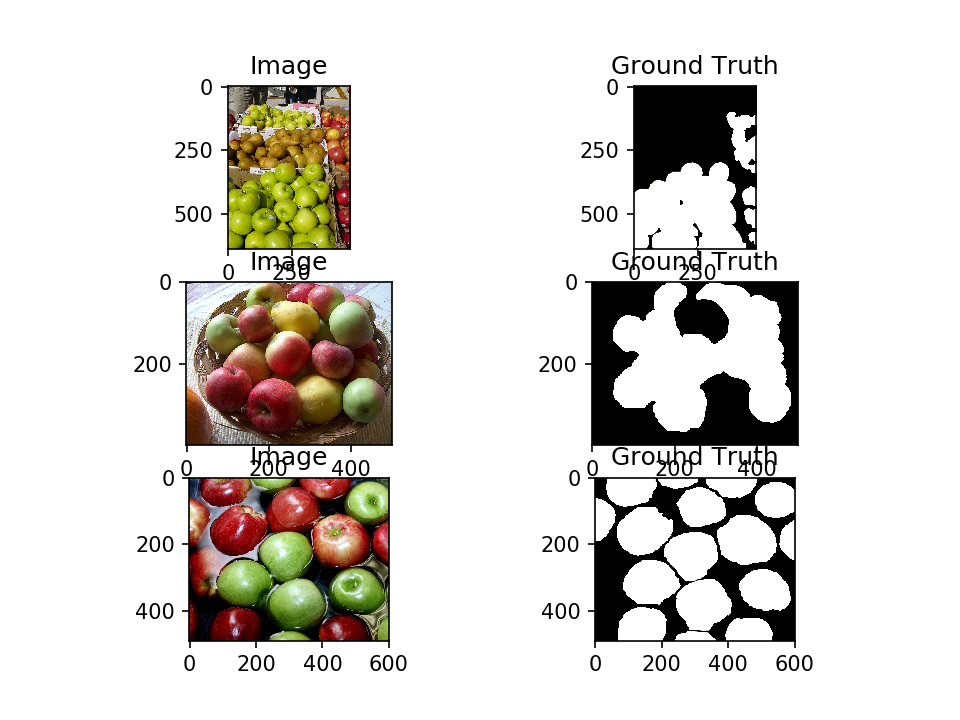

Text(0.5,1,'Ground Truth')

In [29]:
## Let's first show the  training images and thier ground truth

# set up plots.
f,((ax1, ax2),(ax4, ax5),(ax7, ax8)) = plt.subplots(3, 2)
#show the image
ax1.imshow(ColorImgs[0])
ax1.set_title('Image')
#show the ground truth mask
ax2.imshow(ColorImgsGT[0])
ax2.set_title('Ground Truth')
#show our prediction!


ax4.imshow(ColorImgs[1])
ax4.set_title('Image')
#show the ground truth mask
ax5.imshow(ColorImgsGT[1])
ax5.set_title('Ground Truth')
#show our prediction!

ax7.imshow(ColorImgs[2])
ax7.set_title('Image')
#show the ground truth mask
ax8.imshow(ColorImgsGT[2])
ax8.set_title('Ground Truth')
#show our prediction!


### The above figure shows the training sampls with their ground truth. These samples are nice to be a training data because thier coverd all the color an apple should be and the area of positive and negative samples takes roughly 50/50 so less bias towards a particular class.

In [19]:
## This function will take an image and divide all pixels value by 255.
def normalizeImage(image):
    nDim,nPixel = image.shape
    totalP = nPixel
    image[0,:] = image[0,:]/255
    image[1,:] = image[1,:]/255 
    image[2,:] = image[2,:]/255 
    return image

In [20]:
##  This cell will start train the MoG using EM.
 ### Note. this cell runs very slow
data = RGBApple
dataNeg = RGBNonApple
data = normalizeImage(data)
dataNeg = normalizeImage(dataNeg)
mixGaussEst = fitMixGauss(data,2);
mixGaussEstNeg = fitMixGauss(dataNeg,2);


we are in interation: 0
we are in interation: 1
we are in interation: 2
we are in interation: 0
we are in interation: 1
we are in interation: 2


In [21]:
#fit Gaussian model for non-apple data
meanNonAppleT = mixGaussEstNeg['mean']
covNonAppleT  = mixGaussEstNeg['cov']
weightNonAppleT = mixGaussEstNeg['weight']
#fit Gaussian model for apple data
meanAppleT = mixGaussEst['mean']

covAppleT  = mixGaussEst['cov']
weightAppleT = mixGaussEst['weight']

<IPython.core.display.Javascript object>


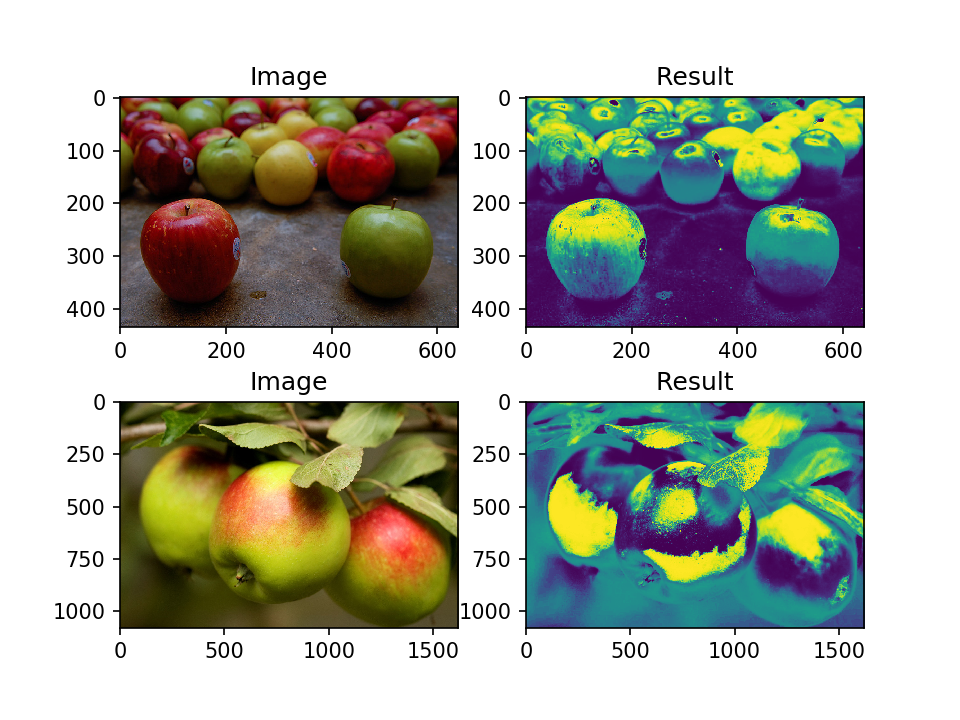

Text(0.5,1,'Result')

In [38]:
## This cell will show the images from C) and thier calculated posterior

# set up plots.
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2)
#show the image
ax1.imshow(TColorImgs[0])
ax1.set_title('Image')

#show our prediction!
result1 = calPosterior(TColorImgs[0],meanAppleT,covAppleT,meanNonAppleT ,covNonAppleT,weightAppleT,weightNonAppleT)
ax2.imshow(result1)
ax2.set_title('Result')

ax3.imshow(TColorImgs[1])
ax3.set_title('Image')

#show our prediction!
result2 = calPosterior(TColorImgs[1],meanAppleT,covAppleT,meanNonAppleT ,covNonAppleT,weightAppleT,weightNonAppleT)
ax4.imshow(result2)
ax4.set_title('Result')



### After the training of MoG, we can predict the test image's pixel is an apple's pixel or not(Brighter means more likely to be an apple). 
### For the first image, the result indeed highlight all the apples but also highlight part of pears as well. It can be seen that our model shows high response to red but weak to the green, that's way it failed to highlight the whole apple but part for green apples.

### The second image has three apples but with more green area.  The model indeed find the red area but miss few pixels for the left most apple, the model this time also gives very bright result for green which seems a contradiction when looking at the conclusion from the previous one. One possible explaination is the model learns the green but the green is tends to be lighter, green in the first test is much more darker than the scond one.

<IPython.core.display.Javascript object>


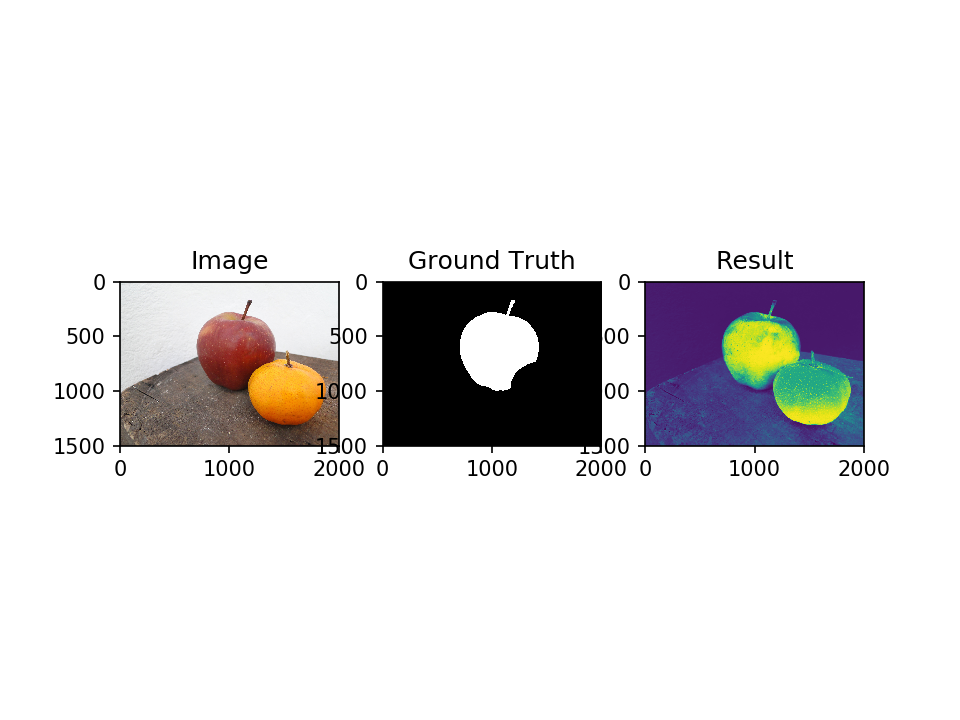

Text(0.5,1,'Result')

In [22]:
## Show the third test with ground truth
f, (ax1, ax2,ax3) = plt.subplots(1, 3)
ax1.imshow(TColorImgs[2])
ax1.set_title('Image')
#show the ground truth mask
ax2.imshow(TColorImgsGT[0])
ax2.set_title('Ground Truth')
#show our prediction!
result3 = calPosterior(TColorImgs[2],meanAppleT,covAppleT,meanNonAppleT ,covNonAppleT,weightAppleT,weightNonAppleT)
ax3.imshow(result3)
ax3.set_title('Result')

### This result comes from a model which is intentionally trained to be flawed(three iteration), which is a good example for underfitting.

### In this special case, the whole apple has been highlighted but the orange on the right is completely being pointed out as well. This is not a good model as it shows response to the color orange which does not belong to apple. This is caused by the orange and color has relatively close pixel value and the model does not regard them as separate cluster, the trained mean may has the value between rgb(red) and rgb(orange), this model can be improved by iteration multiple times.

<IPython.core.display.Javascript object>


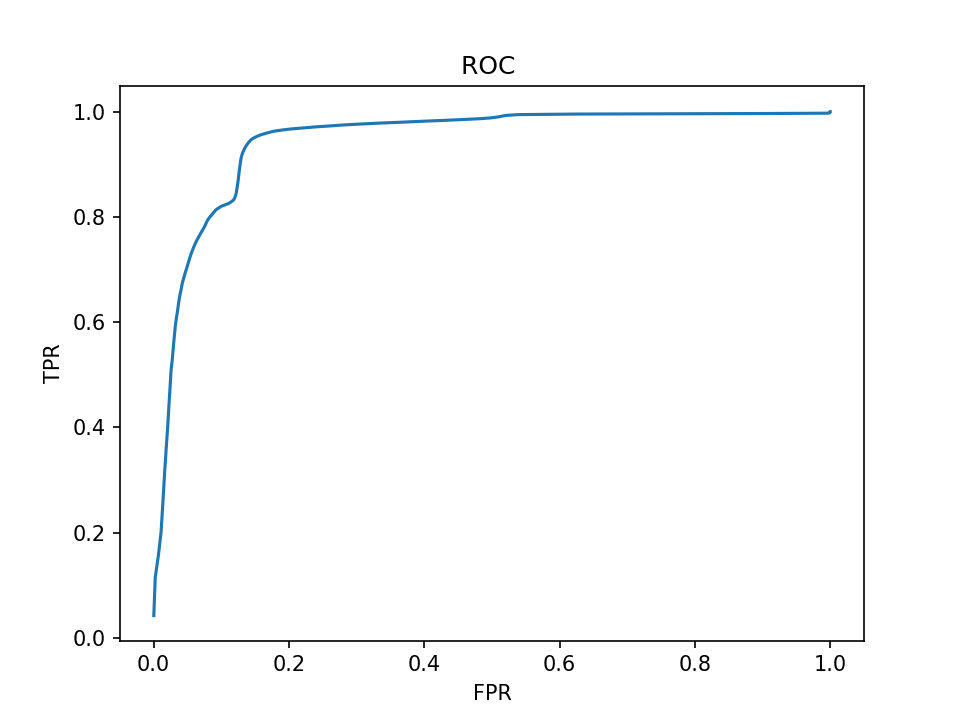

In [32]:
f, (ax1) = plt.subplots(1, 1)
#ax1.plot(FPR,TPR)
ax1.set_title('ROC ')
plt.xlabel('FPR')
plt.ylabel('TPR')
resultDict1 = calROC(result3,100,TColorImgsGT[0])
ax1.plot(resultDict1['FPR'],resultDict1['TPR'])


### Looking at the ROC, it is not a good curve, the expected curve should have a corner at top left, so a high true positive rate with low false positive rate. 

<IPython.core.display.Javascript object>


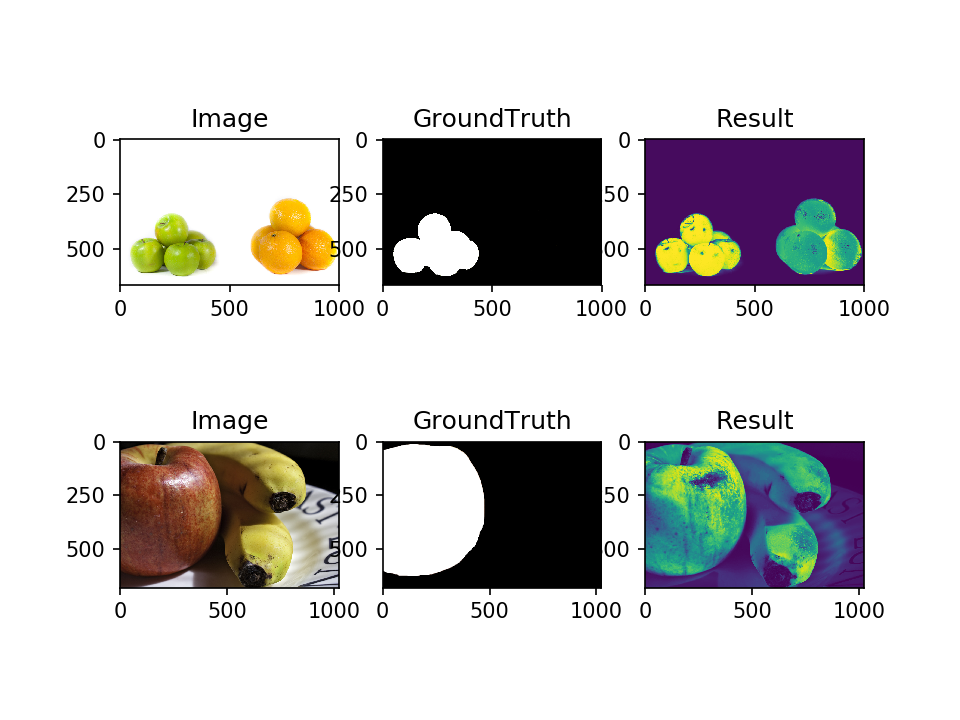

Text(0.5,1,'Result')

In [37]:
## Show the images, ground truths and thier result for part E
f, ((ax1, ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3)
#show the image
ax1.imshow(TColorImgs2[0])
ax1.set_title('Image')
#show the ground truth mask

#show our prediction!

ax2.imshow(TColorImgsGT2[0])
ax2.set_title('GroundTruth')

newResult1 = calPosterior(TColorImgs2[0],meanAppleT,covAppleT,meanNonAppleT ,covNonAppleT,weightAppleT,weightNonAppleT)
ax3.imshow(newResult1)
ax3.set_title('Result')


ax4.imshow(TColorImgs2[1])
ax4.set_title('Image')
#show the ground truth mask

ax5.imshow(TColorImgsGT2[1])
ax5.set_title('GroundTruth')


#show our prediction!
newResult2 = calPosterior(TColorImgs2[1],meanAppleT,covAppleT,meanNonAppleT ,covNonAppleT,weightAppleT,weightNonAppleT)
ax6.imshow(newResult2)
ax6.set_title('Result')


### Here we have the test result for the extra two images.  The model(flawed one) has similar flaws that treat orange as apple(red) but successfuly cope the green apple case. The second one however, treat yellow as positive which is not a expected result.

In [31]:
## This function computes the TPR/ FPR used for ploting ROC
def calROC(result,nThreshold,TColorImgsGT):

    #f, (ax1,ax2) = plt.subplots(1, 2)
    #ax1.imshow(result3[result3>0.5])
    #threshold = 0.4
    #afterThre = (result3>threshold) * result3
    #ax1.imshow(afterThre)
    singleChannelGT = TColorImgsGT[:,:,0]
    TPR = np.zeros(nThreshold)
    FPR = np.zeros(nThreshold)

#ax2.imshow(t/255)

    for p in range(nThreshold):  
        threshold = p/nThreshold
        afterThre = (result>threshold) * result
        tp=0
        fp=0
        predictedP = np.count_nonzero(afterThre)
        predictedN = np.count_nonzero(afterThre==0)
        realP = np.count_nonzero(singleChannelGT)
        realN = np.count_nonzero(singleChannelGT==0)   
        for i in range(afterThre.shape[0]):
            for j in range(afterThre.shape[1]):
                if afterThre[i,j] >0:
                    if singleChannelGT[i,j] >0:
                        tp+=1
                    else:
                        fp+=1
        fn = realP - tp
        tn = realN - fp
        TPR[p] = tp/(tp+fn)
        FPR[p] = fp/(fp+tn)    
    return {'TPR':TPR, 'FPR':FPR,'fn':fn,'tn':tn,'tp':tp,'fp':fp }

In [48]:
newResultDict1 = calROC(newResult1,100,TColorImgsGT2[0])
newResultDict2 = calROC(newResult2,100,TColorImgsGT2[1])


<IPython.core.display.Javascript object>


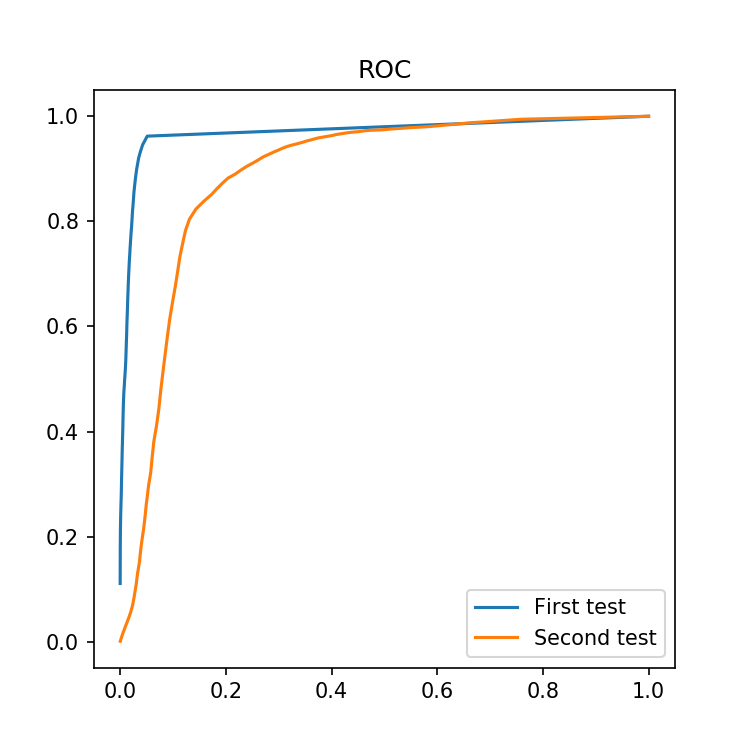

In [52]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(newResultDict1['FPR'],newResultDict1['TPR'],label='First test')
ax.plot(newResultDict2['FPR'],newResultDict2['TPR'],label='Second test')
ax.set_title('ROC')
ax.legend()


### The roc here gives a good example of good and bad performance. The first test has a good turn around which means it's peak performance. The second test does not has a clear edge on the top left and has a smooth transition tradeoff between detect more/ less mis class

In [18]:
## This function is a duplicate from part c
def getMixGaussLogLike(data, mixGaussEst): 
    """
    Calculate the log likelihood for the whole dataset under a mixture of Gaussians model.
    
    Keyword arguments:
    data -- d by n matrix containing data points.
    mixGaussEst -- dict containing the mixture of gaussians parameters.

    Returns: 
    logLike -- scalar containing the log likelihood.
    
    """
    data = np.atleast_2d(data)                                                                         
    # find total number of data items                                                                  
    nDims, nData = data.shape                                                                          
    # initialize log likelihoods                                                                       
    logLike = 0;                                                                                       
                                                                                                       
    # run through each data item                                                                       
    for cData in range(nData):                                                                         
        thisData = data[:, cData] 
        #print(thisData.shape)  
        
        # TO DO - calculate likelihood of this data point under mixture of                         
        # Gaussians model. Replace this                                                                
        like = 0 
        for k in range(mixGaussEst['weight'].shape[0]):
            
            like += mixGaussEst['weight'][k] * multivariate_normal.pdf(thisData,mixGaussEst['mean'][:,k],mixGaussEst['cov'][:,:,k])

        # add to total log like    
        logLike = logLike + np.log(like)  
    return  np.asscalar(logLike)                                                                       
                                                                                                       

In [3]:
## This funciton is a dulicate from part C
def fitMixGauss(data, k):
    """
    Estimate a k MoG model that would fit the data. Incremently plots the outcome.
               
    
    Keyword arguments:
    data -- d by n matrix containing data points.
    k -- scalar representing the number of gaussians to use in the MoG model.
    
    Returns: 
    mixGaussEst -- dict containing the estimated MoG parameters.
    
    """
    
    #     MAIN E-M ROUTINE  
    #     In the E-M algorithm, we calculate a complete posterior distribution over                                  
    #     the (nData) hidden variables in the E-Step.  
    #     In the M-Step, we update the parameters of the Gaussians (mean, cov, w).   
    nDims, nData = data.shape

    #print(nDims)
    postHidden = np.zeros(shape=(k, nData))

    # we will initialize the values to random values
    mixGaussEst = dict()
    mixGaussEst['d'] = nDims
    mixGaussEst['k'] = k
    mixGaussEst['weight'] = (1 / k) * np.ones(shape=(k))
    mixGaussEst['mean'] = 2 * np.random.randn(nDims, k)
    #print(mixGaussEst['mean']) 2x3
    mixGaussEst['cov'] = np.zeros(shape=(nDims, nDims, k))
    #print(mixGaussEst['cov'][:,:,0])
    for cGauss in range(k):
        mixGaussEst['cov'][:, :, cGauss] = 2.5 + 1.5 * np.random.uniform() * np.eye(nDims)
        

    # calculate current likelihood
    # TO DO - fill in this routine
   ############# logLike = getMixGaussLogLike(data, mixGaussEst)
    ###########print('Log Likelihood Iter 0 : {:4.3f}\n'.format(logLike))
    ## Setting iteration lower than 10 seems underfitting, so I try to be conservative with iteration of 20.
    nIter = 20;

    #########logLikeVec = np.zeros(shape=(2 * nIter))
    #######boundVec = np.zeros(shape=(2 * nIter))

    ##fig, ax = plt.subplots(1, 1)

    for cIter in range(nIter):
        print('we are in interation:',cIter)
        # ===================== =====================
        # Expectation step
        # ===================== =====================

        for cData in range(nData):
            # TO DO (g) : fill in column of 'hidden' - calculate posterior probability that
            # this data point came from each of the Gaussians
            # replace this:           
            postHidden[:, cData] = 1/k
            normalizer = 0
            for ks in range(k):
                normalizer += mixGaussEst['weight'][ks]*multivariate_normal.pdf(data[:,cData],mixGaussEst['mean'][:,ks],mixGaussEst['cov'][:,:,ks])
            for ks in range(k):
                postHidden[ks, cData] = mixGaussEst['weight'][ks]*multivariate_normal.pdf(data[:,cData],mixGaussEst['mean'][:,ks],mixGaussEst['cov'][:,:,ks])/normalizer  
        # ===================== =====================
        # Maximization Step
        # ===================== =====================
        # for each constituent Gaussian
        for cGauss in range(k):
            # TO DO (h):  Update weighting parameters mixGauss.weight based on the total
            # posterior probability associated with each Gaussian. Replace this:
            mixGaussEst['weight'][cGauss] = np.sum(postHidden[cGauss, :])/np.sum(postHidden[:, :])

            # TO DO (i):  Update mean parameters mixGauss.mean by weighted average
            # where weights are given by posterior probability associated with
            # Gaussian.  Replace this:
            mixGaussEst['mean'][:,cGauss] = (postHidden[cGauss, :][np.newaxis,:]@data.T)/np.sum(postHidden[cGauss, :])

            # TO DO (j):  Update covarance parameter based on weighted average of
            # square distance from update mean, where weights are given by
            # posterior probability associated with Gaussian

            tempcov =0
            for cData in range(nData):
                tempcov += (postHidden[cGauss, cData] * (data[:,cData]-mixGaussEst['mean'][:,cGauss])[:,np.newaxis]@(data[:,cData]-mixGaussEst['mean'][:,cGauss])[np.newaxis,:])/np.sum(postHidden[cGauss, :])

            mixGaussEst['cov'][:,:,cGauss] = tempcov


    return mixGaussEst

### The reason we really should use three classes is that during the training part, we really need a way to tell us whether we are overfitting or not. Validation set is generated from part of training samples, through this set, it can tell us how well we trained our model before we put it into the test, a way for validation set is through k-fold validation. Then we can apply the model to our real test set to get the result.

## Extra Part


In [53]:
files = glob.glob("extraTestApples/*.jpg")
filesGT = glob.glob("extraTestApples/*.png")
TColorImgs3 = []
TColorImgsGT3 = []
for myFile in files:
    im = plt.imread(myFile)
    TColorImgs3.append(im)
for myFile in filesGT:
    im = plt.imread(myFile)
    TColorImgsGT3.append(im)

<IPython.core.display.Javascript object>


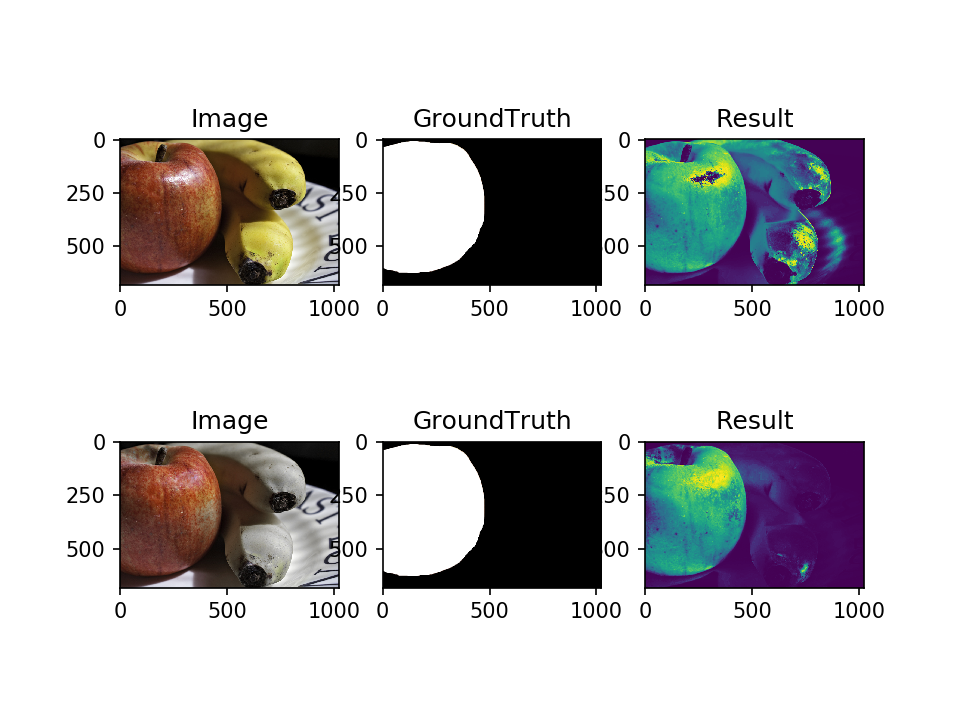

Text(0.5,1,'Result')

In [54]:
f, ((ax1, ax2,ax3),(ax4, ax5,ax6)) = plt.subplots(2, 3)


ax1.imshow(TColorImgs2[1])
ax1.set_title('Image')
#show the ground truth mask
ax2.imshow(TColorImgsGT2[1])
ax2.set_title('GroundTruth')


#show our prediction!
ax3.imshow(newResult2)
ax3.set_title('Result')


#show the image
ax4.imshow(TColorImgs3[0])
ax4.set_title('Image')
#show the ground truth mask

#show our prediction!
ax5.imshow(TColorImgsGT3[0])
ax5.set_title('GroundTruth')

extraResult1 = calPosterior(TColorImgs3[0],meanAppleT,covAppleT,meanNonAppleT ,covNonAppleT,weightAppleT,weightNonAppleT)
ax6.imshow(extraResult1)
ax6.set_title('Result')





##  Both results from the above figure are from the model I trained with iteration = 20. We can just eyeball it to see the difference between the two. Even with well trained model, it still failed to classify the yellow color pixel.

## An extra test when I change the color of banans. The model no longer detects banana now.

<IPython.core.display.Javascript object>


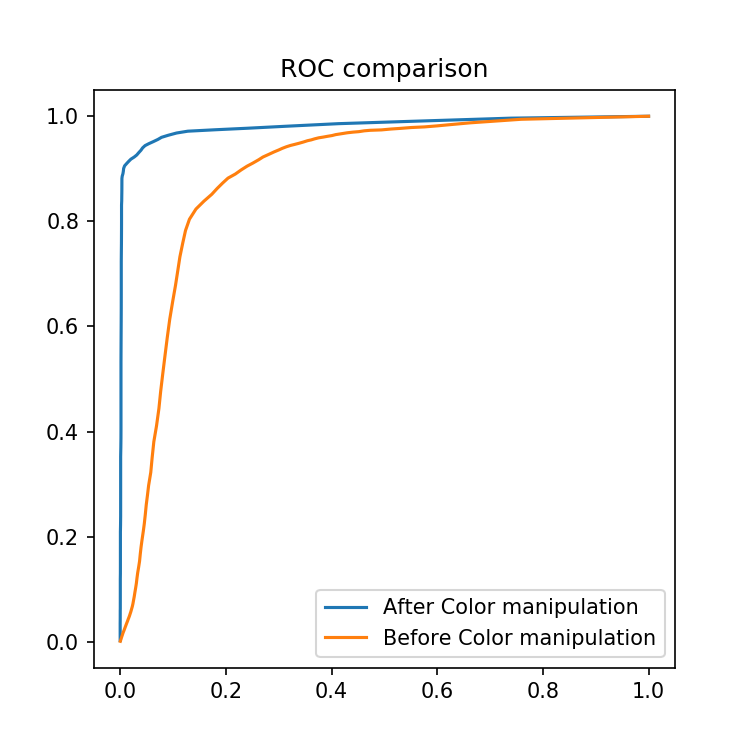

In [57]:
extraResultDict1 = calROC(extraResult1,100,TColorImgsGT3[0])
#newResultDict2 = calROC(result2,100,TColorImgsGT2[1])
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(extraResultDict1['FPR'],extraResultDict1['TPR'],label='After Color manipulation')
ax.plot(newResultDict2['FPR'],newResultDict2['TPR'],label='Before Color manipulation')
ax.set_title('ROC comparison')
ax.legend()


## After I change the color of banana, the curve is much superior than before.

## The reason why model works is based on the pixel colors, we trained the model to know red, green is something we want and discard the other colors. To improve the result, one thing to do is to make negative pixel's color less similar to red and green, just like what I've done here. Or we can transform the color spaces from RGB to HSV for more samples.